In [22]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=2, random_state=24)


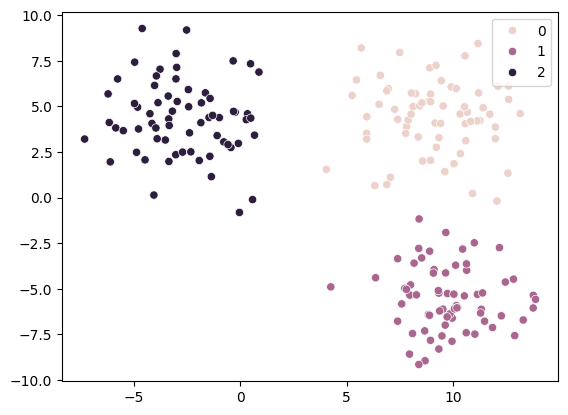

In [24]:
sns.scatterplot(x=features[:,0], y=features[:,1], hue=true_labels)
# plt.legend(loc="lower left")
plt.show()

In [25]:
#Import StandardScaler for feature scaling 
from sklearn.preprocessing import StandardScaler

In [26]:
#Feature transformation 
standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features)

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=24)
 

In [28]:
#Melakukan perhitungan cluster center, kemudian melakukan prediksi cluster untuk setiap data
result = kmeans.fit_predict(scaled_features)


d:\ITS\01. Lab\01. Code\.lab-venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


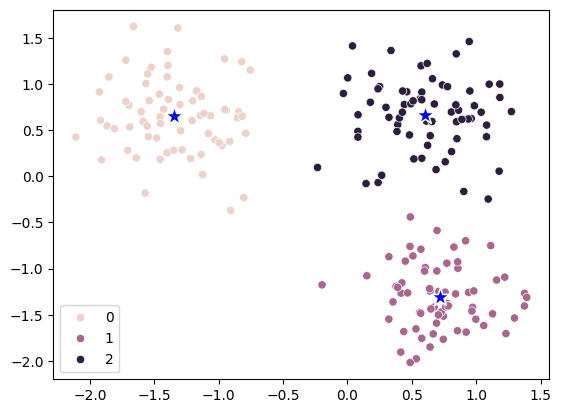

In [29]:
#Menampilkan data dan label clusternya, warna green cluster 0, warna blue cluster 1, warna red cluster 2
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=result)
 
#Menampilkan posisi cluster center
sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=200, marker="*", color="blue")
plt.legend(loc="lower left")
plt.show()

In [30]:
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')

In [31]:
data.head(10)

,customer_id,frequency,recency,monetary
0,12346,1,48,27904840000
1,12347,2,40,423420000
2,12348,2,41,414092000
3,12350,1,33,119478000
4,12352,3,6,449984000
5,12356,1,48,809968000
6,12359,2,28,842749000
7,12361,1,10,67602000
8,12362,1,18,170512000
9,12365,2,14,226652000


In [39]:
RFM_km = data.drop(['customer_id'],axis=1)
print(RFM_km.head())

   frequency  recency     monetary
0          1       48  27904840000
1          2       40    423420000
2          2       41    414092000
3          1       33    119478000
4          3        6    449984000


In [40]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
RFM_standardized = standard_scaler.fit_transform(RFM_km)
RFM_standardized = pd.DataFrame(RFM_standardized)
RFM_standardized.columns = ["Frequency","Monetary","Recency"]
print(RFM_standardized.head())

   Frequency  Monetary    Recency
0  -0.431543  0.428749  24.173698
1   0.042280  0.131641   0.080011
2   0.042280  0.168780   0.071833
3  -0.431543 -0.128328  -0.186463
4   0.516102 -1.131065   0.103301


In [41]:
#Import KMeans untuk mengimplementasikan K-Means Clustering
from sklearn.cluster import KMeans

#Mengatur parameter k-means, jumlah cluster yang akan dibentuk adalah 3
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(RFM_standardized)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_standardized)

#Menggabungkan RFM dan hasil label clustering
RFM_labeled = pd.concat([RFM_standardized, pd.Series(pred).rename("cluster")], axis=1)

d:\ITS\01. Lab\01. Code\.lab-venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


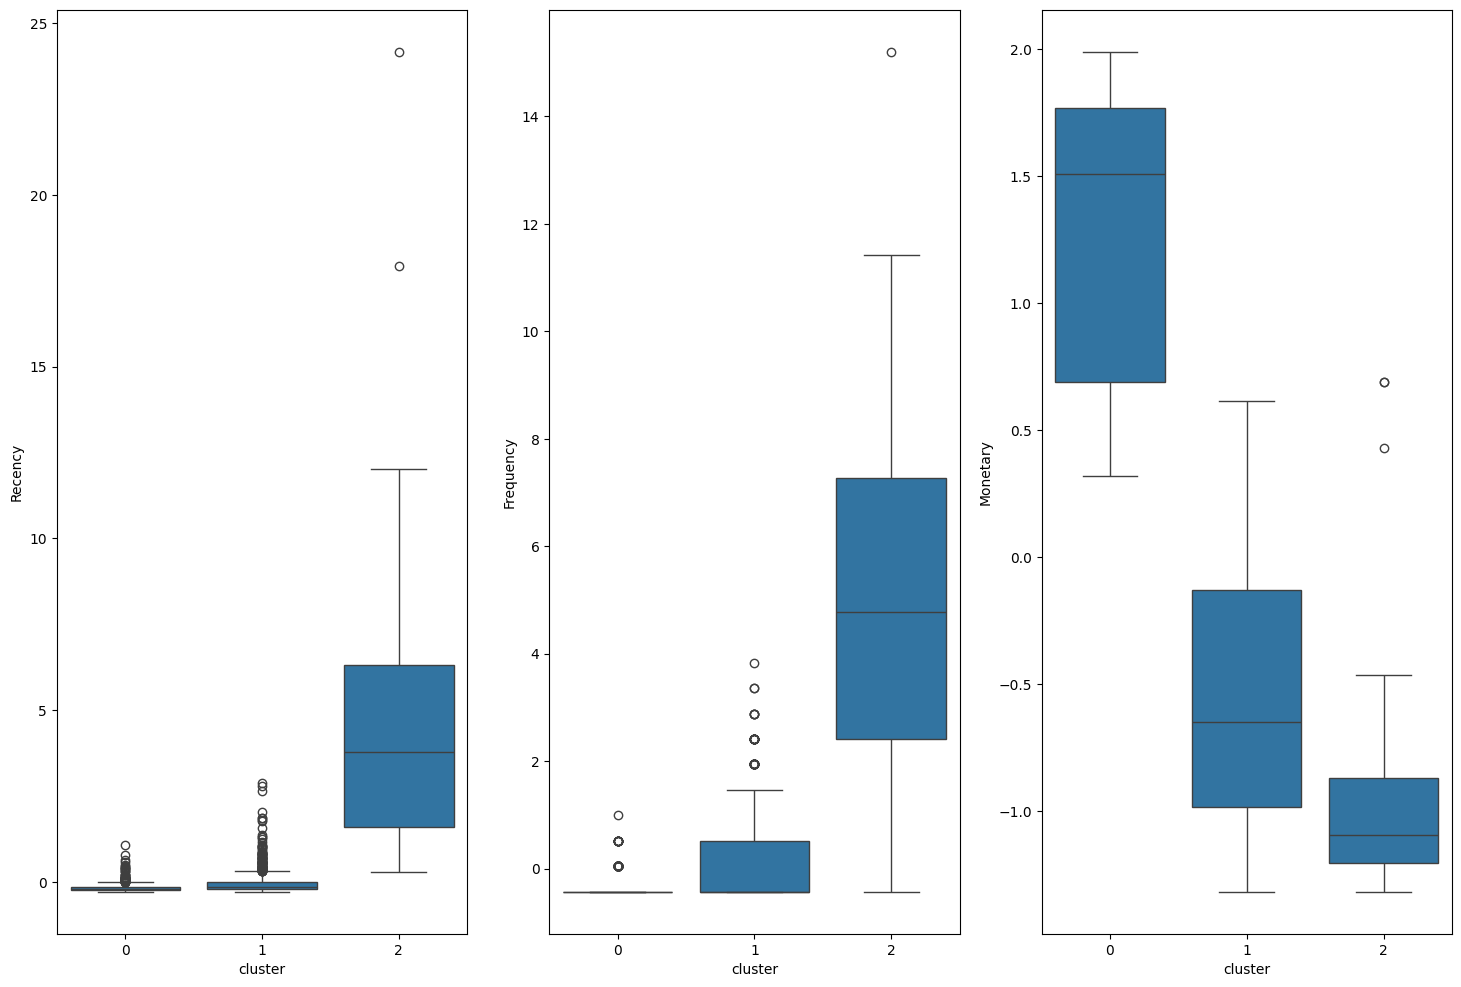

In [43]:
#Menampilkan hasil clustering untuk setiap data dalam bentuk boxplot
fig, ax = plt.subplots(1,3, figsize=(18,12))
sns.boxplot(x="cluster", y="Recency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=RFM_labeled, ax=ax[2])
plt.show()

In [ ]:
# ## Kesimpulan 
# sebanyak 1089 konsumen berada pada cluster 0 merupakan konsumen yang melakukan transaksi akhir-akhir ini dan frekuensi kedatangannya lebih tinggi dibandingkan dengan konsumen pada cluster 2. Konsumen pada cluster 0 memiliki total transaksi lebih banyak daripada cluster 1.

# Untuk cluster 1, terdapat 22 konsumen pada cluster ini (jumlah konsumen paling sedikit) yang sudah cukup lama tidak melakukan transaksi (recency tinggi), namun frekuensi kedatangannya paling tinggi dibandingkan cluster lainnya. Konsumen pada cluster 1 memiliki total transaksi paling kecil dibandingkan dengan cluster lainnya.

# Untuk cluster 2, terdapat 514 konsumen pada cluster ini. Konsumen melakukan transaksi akhir-akhir ini, namun frekuensi kedatangannya paling rendah jika dibandingkan dengan cluster lainnya (frequency rendah). Namun, konsumen pada cluster ini memiliki total transaksi yang jauh lebih banyak dibandingkan dengan cluster lainnya.